# Importing all the necessary libraries

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Reading the data

In [2]:
test = pd.read_csv('test.csv')
test_label = pd.read_csv('test_label.csv',header=None,names=['Total_booking'])
train = pd.read_csv('train.csv')
train_label = pd.read_csv('train_label.csv',header=None,names=['Total_booking'])

In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [4]:
test_label.head()

,Total_booking
0,256
1,87
2,11
3,84
4,668


In [5]:
train_label.head()

,Total_booking
0,504
1,5
2,139
3,209
4,184


# Concatenating the Train and Test data

In [6]:
Train = pd.concat([train,train_label],axis=1)
Test = pd.concat([test,test_label],axis=1)

In [7]:
Train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [8]:
Test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


# Analyzing the data

In [9]:
Train.shape

(8708, 10)

In [10]:
Test.shape

(2178, 10)

In [11]:
Train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [12]:
Test.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [13]:
Train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [14]:
Test.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [15]:
Train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


Train and test data have zero null values

# Feature Engineering

we have to perform feature engineering on both the data so the both the data look same way

In [16]:
Train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [17]:
Train['date'] = pd.to_datetime(Train['datetime'])

In [18]:
Train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00


In [19]:
Train.drop(['datetime'],inplace=True,axis=1)

In [20]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00


In [21]:
Train['year'] = pd.to_datetime(Train['date']).dt.year
Train['month'] = pd.to_datetime(Train['date']).dt.month_name()
Train['hour'] = pd.to_datetime(Train['date']).dt.hour
Train['weekday'] = pd.to_datetime(Train['date']).dt.day_name()


In [22]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00,2012,May,19,Wednesday
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00,2012,September,4,Wednesday
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00,2011,January,9,Thursday
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00,2011,November,16,Friday
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00,2011,September,13,Tuesday


In [23]:
Train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'year', 'month',
       'hour', 'weekday'],
      dtype='object')

In [24]:
Train[['season', 'holiday', 'workingday', 'weather']] = Train[['season', 'holiday', 'workingday', 'weather']].astype('category')

In [25]:
Train.dtypes

season                 category
holiday                category
workingday             category
weather                category
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date             datetime64[ns]
year                      int64
month                    object
hour                      int64
weekday                  object
dtype: object

On Test Data

In [26]:
Test['date'] = pd.to_datetime(Test['datetime'])

In [27]:
Test['year'] = pd.to_datetime(Test['date']).dt.year
Test['month'] = pd.to_datetime(Test['date']).dt.month_name()
Test['hour'] = pd.to_datetime(Test['date']).dt.hour
Test['weekday'] = pd.to_datetime(Test['date']).dt.day_name()

In [28]:
Test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10 11:00:00,2012,May,11,Thursday
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09 07:00:00,2012,June,7,Saturday
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06 20:00:00,2011,March,20,Sunday
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13 11:00:00,2011,October,11,Thursday
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02 12:00:00,2012,June,12,Saturday


In [29]:
Test[['season', 'holiday', 'workingday', 'weather']] = Test[['season', 'holiday', 'workingday', 'weather']].astype('category')

In [30]:
Test.dtypes

datetime                 object
season                 category
holiday                category
workingday             category
weather                category
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date             datetime64[ns]
year                      int64
month                    object
hour                      int64
weekday                  object
dtype: object

In [31]:
Test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10 11:00:00,2012,May,11,Thursday
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09 07:00:00,2012,June,7,Saturday
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06 20:00:00,2011,March,20,Sunday
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13 11:00:00,2011,October,11,Thursday
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02 12:00:00,2012,June,12,Saturday


In [32]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00,2012,May,19,Wednesday
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00,2012,September,4,Wednesday
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00,2011,January,9,Thursday
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00,2011,November,16,Friday
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00,2011,September,13,Tuesday


# Outliers Analysis

<AxesSubplot:xlabel='Total_booking', ylabel='season'>

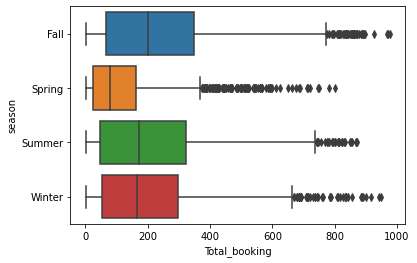

In [33]:
sns.boxplot(x='Total_booking',y='season',data=Train)

<AxesSubplot:xlabel='Total_booking', ylabel='workingday'>

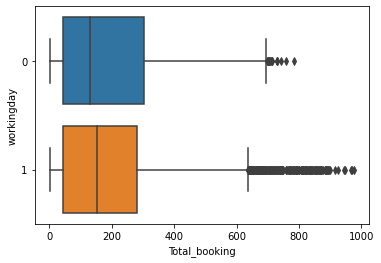

In [34]:
sns.boxplot(x='Total_booking',y='workingday',data=Train)

<AxesSubplot:xlabel='hour', ylabel='Total_booking'>

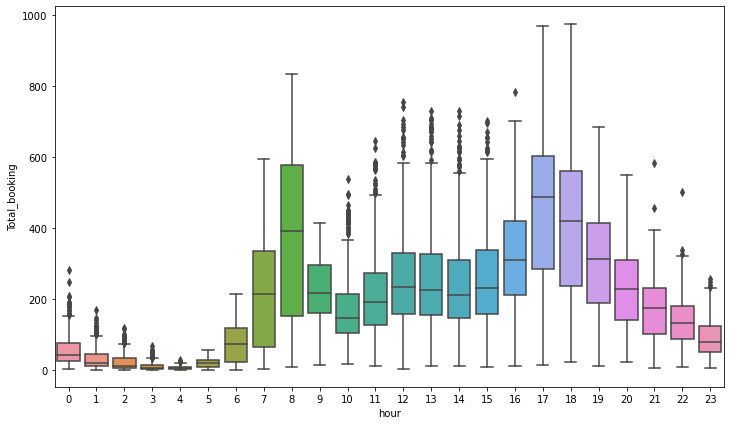

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='hour',y='Total_booking',data=Train)

<AxesSubplot:xlabel='weekday', ylabel='Total_booking'>

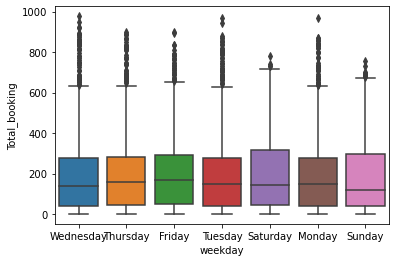

In [36]:
sns.boxplot(x='weekday',y='Total_booking',data=Train)

In [37]:
Train.groupby(['season'])['Total_booking'].mean()

season
Fall      237.344906
Spring    117.019663
Summer    215.086482
Winter    200.666972
Name: Total_booking, dtype: float64

finding the outlier

In [38]:
Q1 = Train.Total_booking.quantile(0.25)
Q3 = Train.Total_booking.quantile(0.75)
Q1, Q3

(43.0, 286.0)

In [39]:
IQR = Q3 - Q1
IQR

243.0

In [40]:
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
lower_limit, upper_limit

(-321.5, 650.5)

In [41]:
outliers = Train[(Train.Total_booking<lower_limit)|(Train.Total_booking>upper_limit)]

In [42]:
outliers

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,2012-08-17 17:00:00,2012,August,17,Friday
27,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,2012-05-02 18:00:00,2012,May,18,Wednesday
30,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,2012-07-10 17:00:00,2012,July,17,Tuesday
52,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,2012-06-05 18:00:00,2012,June,18,Tuesday
70,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,2012-05-18 18:00:00,2012,May,18,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662,2012-03-14 08:00:00,2012,March,8,Wednesday
8582,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737,2012-10-15 08:00:00,2012,October,8,Monday
8676,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659,2012-05-12 13:00:00,2012,May,13,Saturday
8681,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858,2012-08-08 17:00:00,2012,August,17,Wednesday


So I used IQR formula to find the outliers in the Train data so, there are 242 outliers we have to remove them to make a better predictive model

Removing the outlier

In [43]:
Traind = Train[(Train.Total_booking>lower_limit)&(Train.Total_booking<upper_limit)]

In [44]:
Train = Traind

In [45]:
Train.shape

(8466, 14)

Correlation Analysis

In [46]:
Train.corr()

,temp,atemp,humidity,windspeed,Total_booking,year,hour
temp,1.000000,0.985214,-0.052052,-0.031265,0.389198,0.045449,0.134702
atemp,0.985214,1.000000,-0.030614,-0.073184,0.386209,0.042717,0.130159
humidity,-0.052052,-0.030614,1.000000,-0.322381,-0.312485,-0.062993,-0.266331
windspeed,-0.031265,-0.073184,-0.322381,1.000000,0.102777,-0.019651,0.131759
Total_booking,0.389198,0.386209,-0.312485,0.102777,1.000000,0.213508,0.425427
year,0.045449,0.042717,-0.062993,-0.019651,0.213508,1.000000,-0.006549
hour,0.134702,0.130159,-0.266331,0.131759,0.425427,-0.006549,1.000000


<AxesSubplot:xlabel='Total_booking', ylabel='temp'>

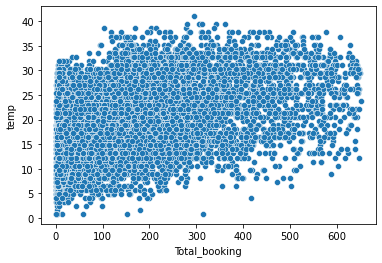

In [47]:
sns.scatterplot(x='Total_booking',y='temp',data = Train)

<AxesSubplot:xlabel='Total_booking', ylabel='atemp'>

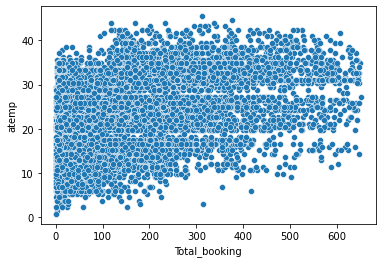

In [48]:
sns.scatterplot(x='Total_booking',y='atemp',data = Train)

<AxesSubplot:xlabel='Total_booking', ylabel='humidity'>

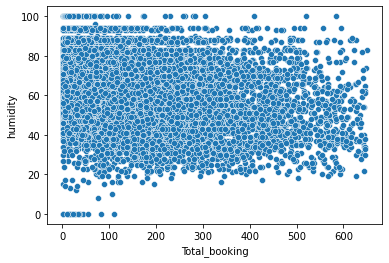

In [49]:
sns.scatterplot(x='Total_booking',y='humidity',data = Train)

<AxesSubplot:xlabel='Total_booking', ylabel='windspeed'>

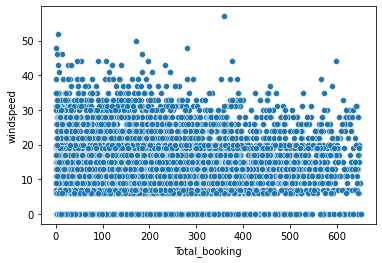

In [50]:
sns.scatterplot(x='Total_booking',y='windspeed',data = Train)

<AxesSubplot:>

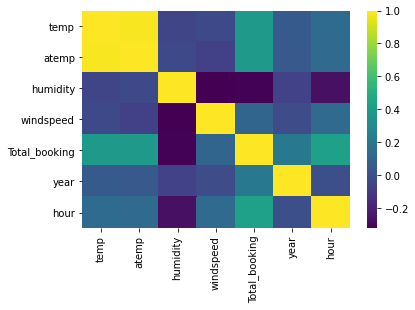

In [51]:
sns.heatmap(Train.corr(),cmap='viridis',yticklabels=True)

Data Visualization

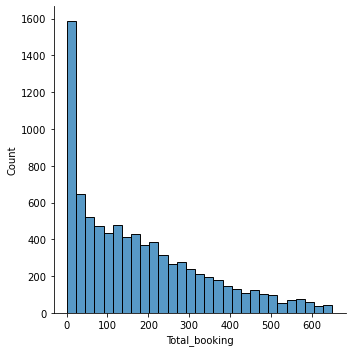

In [52]:
sns.displot(x='Total_booking',data=Train)

From above Distribution Plot we can see our data is positively skewed

<AxesSubplot:xlabel='Total_booking', ylabel='month'>

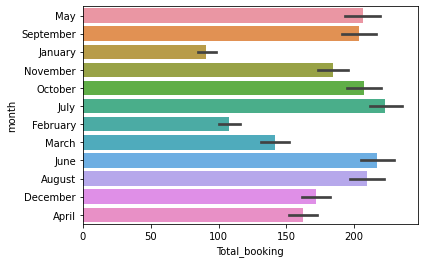

In [53]:
sns.barplot(x='Total_booking',y='month',data=Train)

In [54]:
Train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'year', 'month',
       'hour', 'weekday'],
      dtype='object')

<AxesSubplot:xlabel='Total_booking', ylabel='season'>

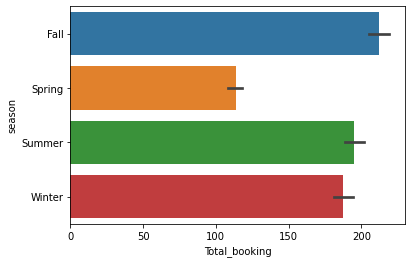

In [55]:
sns.barplot(x='Total_booking',y='season',data=Train)

<AxesSubplot:xlabel='Total_booking', ylabel='weekday'>

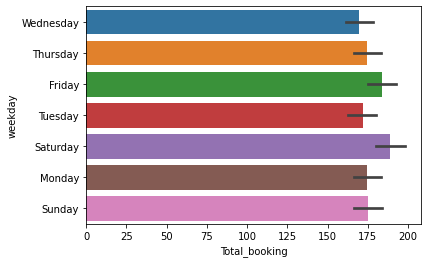

In [56]:
sns.barplot(x='Total_booking',y='weekday',data=Train)

<AxesSubplot:xlabel='hour', ylabel='Total_booking'>

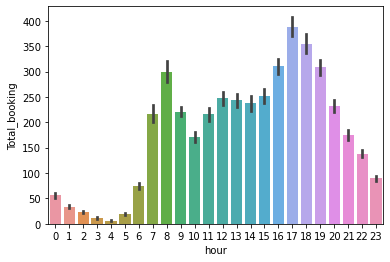

In [57]:
sns.barplot(x='hour',y='Total_booking',data=Train)

In [58]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00,2012,May,19,Wednesday
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00,2012,September,4,Wednesday
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00,2011,January,9,Thursday
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00,2011,November,16,Friday
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00,2011,September,13,Tuesday


<AxesSubplot:xlabel='Total_booking', ylabel='Count'>

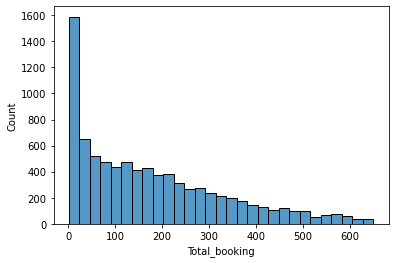

In [59]:
sns.histplot(x='Total_booking',data=Train)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

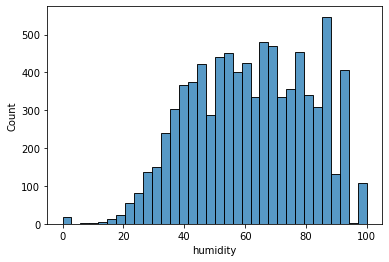

In [60]:
sns.histplot(x='humidity',data=Train)

In [61]:
Train.dtypes

season                 category
holiday                category
workingday             category
weather                category
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date             datetime64[ns]
year                      int64
month                    object
hour                      int64
weekday                  object
dtype: object

In [62]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00,2012,May,19,Wednesday
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00,2012,September,4,Wednesday
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00,2011,January,9,Thursday
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00,2011,November,16,Friday
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00,2011,September,13,Tuesday


In [63]:
dummies = Train[['season','weather']]

In [64]:
dummies = pd.get_dummies(dummies,drop_first=True)

In [65]:
Train = pd.concat([Train,dummies],axis=1)

In [66]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00,2012,May,19,Wednesday,0,1,0,0,0,0
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00,2012,September,4,Wednesday,0,0,0,0,0,0
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00,2011,January,9,Thursday,1,0,0,0,0,0
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00,2011,November,16,Friday,0,0,1,0,0,0
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00,2011,September,13,Tuesday,0,0,0,0,0,0


In [67]:
Train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'year', 'month',
       'hour', 'weekday', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

In [68]:
Train['weekday'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'], dtype=object)

In [69]:
d = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

In [70]:
Train['weekday_no']= Train['weekday'].map(d)

In [71]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,...,month,hour,weekday,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,weekday_no
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00,...,May,19,Wednesday,0,1,0,0,0,0,3
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00,...,September,4,Wednesday,0,0,0,0,0,0,3
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00,...,January,9,Thursday,1,0,0,0,0,0,4
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00,...,November,16,Friday,0,0,1,0,0,0,5
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00,...,September,13,Tuesday,0,0,0,0,0,0,2


In [72]:
Train.corr()

,temp,atemp,humidity,windspeed,Total_booking,year,hour,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,weekday_no
temp,1.000000,0.985214,-0.052052,-0.031265,0.389198,0.045449,0.134702,-0.567009,0.193684,-0.262132,-0.016535,-0.022403,-0.045424,-0.023604
atemp,0.985214,1.000000,-0.030614,-0.073184,0.386209,0.042717,0.130159,-0.571875,0.206073,-0.240840,-0.015495,-0.029295,-0.038411,-0.032126
humidity,-0.052052,-0.030614,1.000000,-0.322381,-0.312485,-0.062993,-0.266331,-0.178718,-0.016286,0.121029,0.013643,0.291695,0.219530,-0.065087
windspeed,-0.031265,-0.073184,-0.322381,1.000000,0.102777,-0.019651,0.131759,0.142744,0.041349,-0.080572,-0.009045,0.048152,-0.052236,-0.006030
Total_booking,0.389198,0.386209,-0.312485,0.102777,1.000000,0.213508,0.425427,-0.234284,0.066731,0.039575,-0.000902,-0.123344,-0.031498,0.029191
year,0.045449,0.042717,-0.062993,-0.019651,0.213508,1.000000,-0.006549,0.008757,-0.010650,0.007711,0.011066,-0.017910,0.021182,-0.018463
hour,0.134702,0.130159,-0.266331,0.131759,0.425427,-0.006549,1.000000,0.013544,-0.011084,0.004737,0.010191,0.013217,-0.048487,-0.009356
season_Spring,-0.567009,-0.571875,-0.178718,0.142744,-0.234284,0.008757,0.013544,1.000000,-0.333963,-0.336173,0.018781,-0.003373,0.007298,0.013268
season_Summer,0.193684,0.206073,-0.016286,0.041349,0.066731,-0.010650,-0.011084,-0.333963,1.000000,-0.335222,-0.006272,0.006433,0.001950,-0.006457
season_Winter,-0.262132,-0.240840,0.121029,-0.080572,0.039575,0.007711,0.004737,-0.336173,-0.335222,1.000000,-0.006314,0.007756,0.043667,0.006105


In [73]:
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,...,month,hour,weekday,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,weekday_no
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02 19:00:00,...,May,19,Wednesday,0,1,0,0,0,0,3
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05 04:00:00,...,September,4,Wednesday,0,0,0,0,0,0,3
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13 09:00:00,...,January,9,Thursday,1,0,0,0,0,0,4
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18 16:00:00,...,November,16,Friday,0,0,1,0,0,0,5
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13 13:00:00,...,September,13,Tuesday,0,0,0,0,0,0,2


In [74]:
Train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'year', 'month',
       'hour', 'weekday', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_no'],
      dtype='object')

In [75]:
Train.drop(['season','weather','windspeed','date','month','weekday','season_Summer', 'season_Winter',
            'weather_ Heavy Rain + Thunderstorm ',
            'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
            'weekday_no'],axis=1,inplace=True)

In [76]:
Train.head()

,holiday,workingday,temp,atemp,humidity,Total_booking,year,hour,season_Spring
0,0,1,22.14,25.760,77,504,2012,19,0
1,0,1,28.70,33.335,79,5,2012,4,0
2,0,1,5.74,6.060,50,139,2011,9,1
3,0,1,13.94,16.665,29,209,2011,16,0
4,0,1,30.34,33.335,51,184,2011,13,0


# Preparing the test data to be as same as training data

In [77]:
Test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10 11:00:00,2012,May,11,Thursday
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09 07:00:00,2012,June,7,Saturday
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06 20:00:00,2011,March,20,Sunday
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13 11:00:00,2011,October,11,Thursday
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02 12:00:00,2012,June,12,Saturday


In [78]:
dummies = pd.get_dummies(Test[['season','weather']],drop_first=True)

In [79]:
dummies

,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,1,0
3,0,0,1,0,1
4,0,1,0,0,0
...,...,...,...,...,...
2173,1,0,0,0,0
2174,1,0,0,0,1
2175,1,0,0,0,0
2176,0,1,0,0,0


In [80]:
dummies = dummies['season_Spring']

In [81]:
Test = pd.concat([Test,dummies],axis=1)

In [82]:
Test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,year,month,hour,weekday,season_Spring
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10 11:00:00,2012,May,11,Thursday,0
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09 07:00:00,2012,June,7,Saturday,0
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06 20:00:00,2011,March,20,Sunday,1
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13 11:00:00,2011,October,11,Thursday,0
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02 12:00:00,2012,June,12,Saturday,0


In [83]:
Test.drop(['datetime','season','weather','windspeed','date','month','weekday'],axis=1,inplace=True)

In [84]:
Test.head()

,holiday,workingday,temp,atemp,humidity,Total_booking,year,hour,season_Spring
0,0,1,21.32,25.000,48,256,2012,11,0
1,0,0,23.78,27.275,64,87,2012,7,0
2,0,0,11.48,12.120,100,11,2011,20,1
3,0,1,25.42,28.790,83,84,2011,11,0
4,0,0,25.42,31.060,43,668,2012,12,0


In [121]:
xt = Test.drop(['Total_booking'],axis=1)

# Splitting the data for training

In [85]:
Train.reset_index(drop=True,inplace=True)

In [86]:
X = Train.drop(['Total_booking'],axis=1)
y = Train['Total_booking']

In [87]:
X

,holiday,workingday,temp,atemp,humidity,year,hour,season_Spring
0,0,1,22.14,25.760,77,2012,19,0
1,0,1,28.70,33.335,79,2012,4,0
2,0,1,5.74,6.060,50,2011,9,1
3,0,1,13.94,16.665,29,2011,16,0
4,0,1,30.34,33.335,51,2011,13,0
...,...,...,...,...,...,...,...,...
8461,1,0,4.10,6.820,54,2012,6,1
8462,0,1,16.40,20.455,87,2011,1,0
8463,0,1,23.78,27.275,56,2011,3,0
8464,0,1,11.48,13.635,61,2012,1,0


In [88]:
rfc = RandomForestRegressor()
adb = AdaBoostRegressor()
br = BaggingRegressor()
sv = SVR()
kn = KNeighborsRegressor()


In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
cross_val_score(rfc,X,y,cv=15).mean()

0.9029442676451799

In [95]:
cross_val_score(adb,X,y,cv=10).mean()

0.6210672583988927

In [96]:
cross_val_score(br,X,y,cv=10).mean()

0.8976419500166395

In [97]:
cross_val_score(sv,X,y,cv=10).mean()

-0.05261371302869371

In [98]:
cross_val_score(kn,X,y,cv=10).mean()

0.632367368897968

# Random forest regressor performed well on cross valiadtion.

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [102]:
rfc.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
pred = rfc.predict(X_test)

In [104]:
pred

array([136.78, 243.08,  68.22, ...,  39.06, 274.03, 112.13])

In [107]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

52.196340411882424

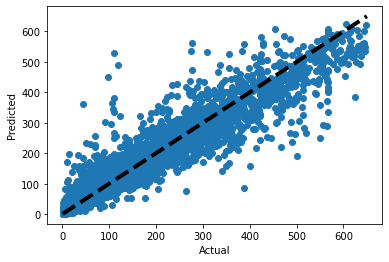

In [162]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [180]:
b = pd.DataFrame(pred,columns=['actual'])

Adaboost regressor

In [108]:
adb.fit(X_train,y_train)

AdaBoostRegressor()

In [109]:
adbpred = adb.predict(X_test)

In [110]:
np.sqrt(metrics.mean_squared_error(y_test,adbpred))

96.78740383328649

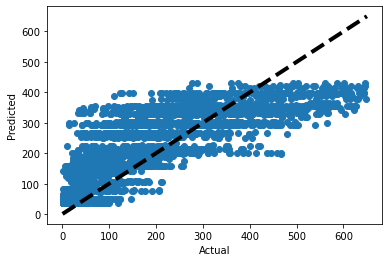

In [161]:
fig, ax = plt.subplots()
ax.scatter(y_test, adbpred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

Bagging regressor

In [111]:
br.fit(X_train,y_train)

BaggingRegressor()

In [112]:
brpred = br.predict(X_test)

In [113]:
np.sqrt(metrics.mean_squared_error(y_test,brpred))

54.10548649694874

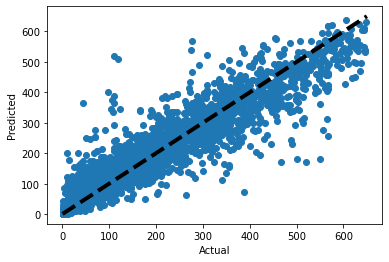

In [160]:
fig, ax = plt.subplots()
ax.scatter(y_test, brpred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

Support vector regressor

In [114]:
sv.fit(X_train,y_train)

SVR()

In [115]:
svpred = sv.predict(X_test)

In [116]:
np.sqrt(metrics.mean_squared_error(y_test,svpred))

162.5258584846349

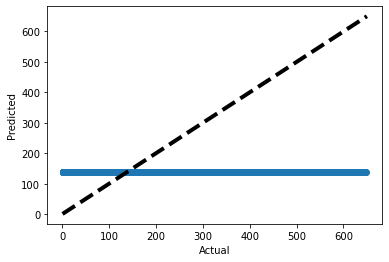

In [159]:
fig, ax = plt.subplots()
ax.scatter(y_test, svpred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

Knearest Neighbours

In [117]:
kn.fit(X_train,y_train)

KNeighborsRegressor()

In [118]:
knpred = kn.predict(X_test)

In [119]:
np.sqrt(metrics.mean_squared_error(y_test,knpred))

99.273114847686

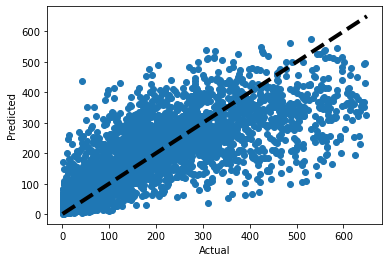

In [163]:
fig, ax = plt.subplots()
ax.scatter(y_test, knpred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

# Hyperparameter tuning of Random forest

In [176]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15,20,25,30,35],
    'max_features': [2, 3,4,5,6,7,8,9],
    'min_samples_leaf': [1,2,3, 4, 5,6,7,8,9],
    'min_samples_split': [1,2,3,4,5,6,7,8,9],
    'n_estimators': [100,150,200]
}

In [177]:
gr = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3)

In [ ]:
gr.fit(X_train,y_train)

In [171]:
gr.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [172]:
rf = RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth=30,max_features=3,min_samples_leaf=3,min_samples_split=3)

In [173]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features=3, min_samples_leaf=3,
                      min_samples_split=3)

In [174]:
rfpred = rf.predict(X_test)

In [175]:
np.sqrt(metrics.mean_squared_error(y_test,rfpred))

61.81873123294454